Univariate Time Series Forecasting using a LSTM neural network model 

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from datetime import datetime
from datetime import timedelta
sns.set(style="ticks", rc={"lines.linewidth": 1.5})

In [24]:
## use pyspark to import a dataset if necessary

import pyspark.sql.functions as sf
import pyspark.sql.types as st
from pyspark.sql.window import Window
from pyspark.context import SparkContext
#date_exp = sqlContext.sql("select * FROM ...")



In [25]:
'''date formatting
date_exp[['payment_date']] = date_exp[['payment_date']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[4:6],s[6:], s[0:4]))

date_exp['payment_date'] = pd.to_datetime(date_exp.payment_date)
date_exp.set_index('payment_date', inplace=True,drop=True)

date_exp = date_exp[(date_exp['faster_payments']>1)]

check dataset visually

plt.figure(figsize = (20,8))
date_bk.groupby(['payment_date'])[['faster_payments']].mean().plot(lw=2.5, figsize=(12, 5));
plt.show();

'''


'date formatting\ndate_exp[[\'payment_date\']] = date_exp[[\'payment_date\']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[4:6],s[6:], s[0:4]))\n\ndate_exp[\'payment_date\'] = pd.to_datetime(date_exp.payment_date)\ndate_exp.set_index(\'payment_date\', inplace=True,drop=True)\n\ndate_exp = date_exp[(date_exp[\'faster_payments\']>1)]\n\ncheck dataset visually\n\nplt.figure(figsize = (20,8))\ndate_bk.groupby([\'payment_date\'])[[\'faster_payments\']].mean().plot(lw=2.5, figsize=(12, 5));\nplt.show();\n\n'

In [40]:
milk = pd.read_csv('/Users/paul.carroll/Documents/datasets/monthlymilkproductionpounds.csv', index_col = 'Month')

rename_map = {'Monthly milk production: pounds per cow. Jan 62 ? Dec 75':'prod'}

milk.rename(columns=rename_map, inplace=True)
milk.head()

,prod
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [50]:
app_data = pd.read_csv('/Users/paul.carroll/Documents/datasets/App_data.csv',index_col = 'Month')

In [51]:
app_data.head()

,App Users
Month,
Sep-20,1504415
Oct-20,1715806
Nov-20,1881300
Dec-20,2038510
Jan-21,2285874


In [49]:
#milk[['Month']] = milk[['Month']].applymap(str).applymap(lambda s:"{}-{}

prod    float64
dtype: object

<AxesSubplot:xlabel='Month'>

<Figure size 1440x576 with 0 Axes>

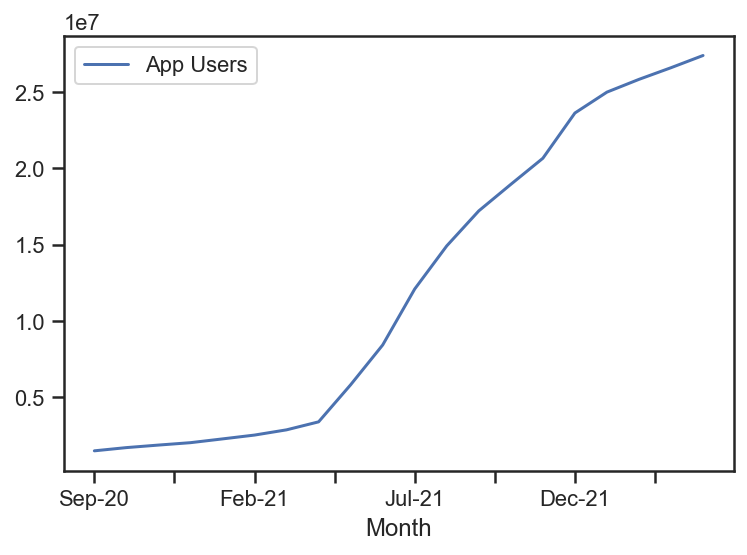

In [54]:
#check your data
plt.figure(figsize = (20,8))
app_data.plot()

In [55]:

import tensorflow as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed



In [56]:
def split_data(data, test_split):
        l = len(data)
        t_idx = round(l*(1-test_split))
        train, test = data[ : t_idx], data[t_idx : ]
        print(f'train: {len(train)} , test: {len(test)}')
        return train, test

In [195]:
#sequence splitter function

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [217]:
# model and variables to run the model 
raw_seq = np.array(app_data)
# define number of training steps
n = 2
m = len(raw_seq)
n_steps_in = m-n
#note that this number is also where x_input length gets defined

# define number of prediction steps
n_steps_out = n

# univariate series being used here as dataset for the prediction
n_features = 1


tf.keras.backend.clear_session()

X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))


model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
#model.add(RepeatVector(n_steps_out))
#model.add(LSTM(100, activation='relu', return_sequences=True))
#model.add(TimeDistributed(Dense(1)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

#fit the model, define number of epochs
model.fit(X, y, epochs=100, verbose=0)

# here used len(raw_seq) -3, to compare the last 3 of raw_seq against the predictions
x_input = array(raw_seq[0:m-n])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



[[29712384. 24831582.]]


In [221]:
# model function 
# variable setting
m = len(raw_seq)
n = 1
n_steps_in = m-n
n_steps_out = n
n_features = 1

def lstm_data(x):

    raw_seq = np.array(x)
    #n_steps_in, n_steps_out = m-n, n
    X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    #return X,y

#def fit_lstm(data):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(100, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=1000, verbose=0)

    x_input = array(raw_seq[0:m-n])
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    #yhat = int(yhat)
    return(yhat)
              

In [222]:
lstm_data(app_data)

array([[[25144260.]]], dtype=float32)

In [223]:
# function to run the model repeatedly, and to average the results. 

def run(data, runs):
    #repeats is how many times you want the model to run
    #n is equal to the last value in the dataset that will be in the model, ie n+1 is the number to predict.
    #model will use 0-n.
    #m= n-2
    #n_steps_in, n_steps_out = m-n, 1
    #n_features = 1
    #m this sets the lower boundary for the data selection into the model. Must be at least 1 less than n.
    #datax= prepare_data(data)
    results = list()
    for r in range(runs):
        result = lstm_data(data)
        #print('>#%d: %.3f' % (r+1, result))
        results.append(result)
        msg = np.mean(results)
    return(msg)
 #   summarize_results(results)
    #return(np.mean(results))



In [224]:
run(app_data,3)

25735864.0

In [226]:
app_data.tail(1)

,App Users
Month,
Apr-22,27400000
